# Hamir Ranavaya-8802243 
## Lab-4

In [23]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


In [24]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [25]:
y_pred_train_linear = model.predict(X_train)
y_pred_test_linear = model.predict(X_test)


Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


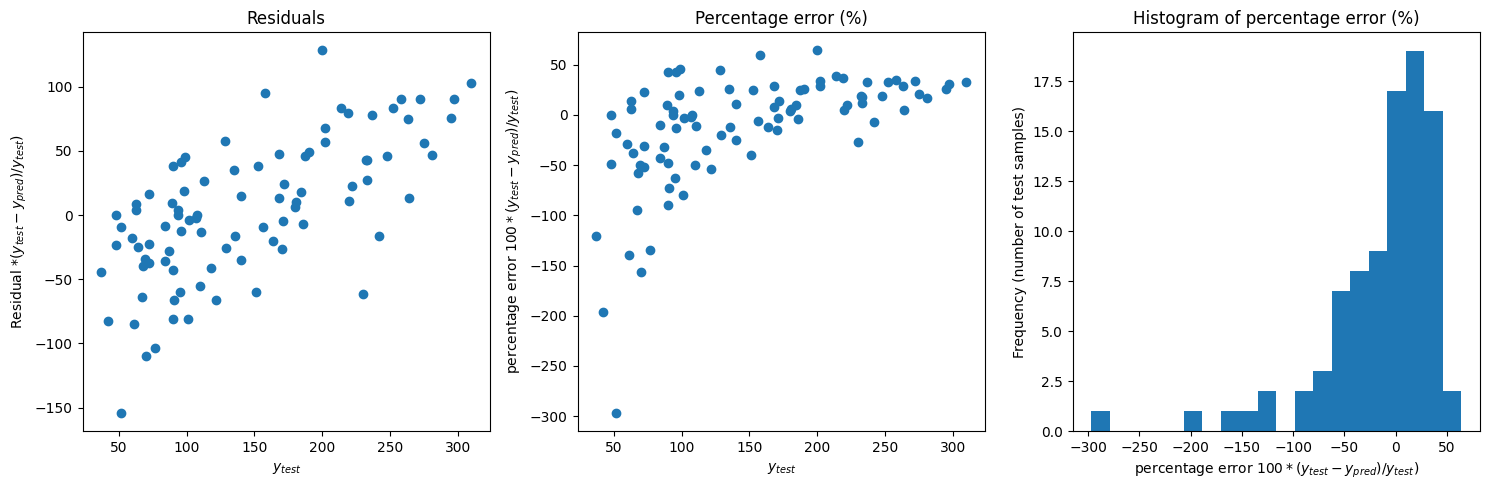

In [26]:
model_estimation(model, y_train, y_test, y_pred_train_linear, y_pred_test_linear)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [29]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
y_pred_train_poly = model.predict(X_train_poly)
y_pred_test_poly = model.predict(X_test_poly)

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

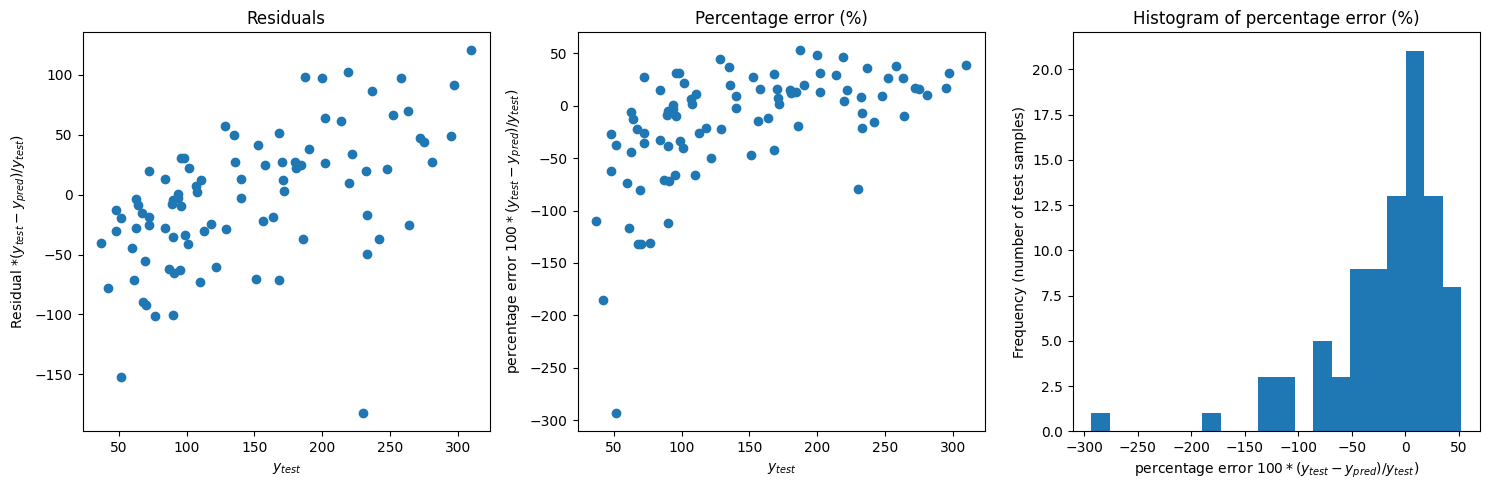

In [31]:
model_estimation(model, y_train, y_test, y_pred_train_poly, y_pred_test_poly)

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score
# Regression Evaluation metrics for the First Linear Model 
print('- Linear Model Metrics:')  
print("Mean Squared error: %.2f" % mean_squared_error(y_test,y_pred_test_linear))
print("MAE: ", (np.round(mean_absolute_error(y_test,y_pred_test_linear), 2)))
print("MAPE: ", (np.round(mean_absolute_percentage_error(y_test,y_pred_test_linear),2)))


# Regression Evaluation metrics for the Polynomial Model 
print('- Polynomial Model Metrics:')
print("Mean Squared error: %.2f" % mean_squared_error(y_test,y_pred_test_poly))
print("MAE: ", (np.round(mean_absolute_error(y_test,y_pred_test_poly), 2)))
print("MAPE: ", (np.round(mean_absolute_percentage_error(y_test,y_pred_test_poly),2)))

- Linear Model Metrics:
Mean Squared error: 2900.19
MAE:  42.79
MAPE:  0.37
- Polynomial Model Metrics:
Mean Squared error: 3096.03
MAE:  43.58
MAPE:  0.38


##### Q1. How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values.

###### Ans: Here in linear regression, there are total of 10 features that corresponds to the number of predictions in the model. Different variale represents dufferent features. The features here are (age, sex, body mass index, bp, S1, S2, S3, S4, S5 and S6).
###### Where as in polynomial regression, the total number of parameters increase as now we are alos dealing with the a power of each features.

##### Q2. Which model would you choose for deployment, and why?

###### Ans: In my opinion, if we compare both linear and polynomial regression, linear regression shows better outputs with respect to both mean absolute error and mean squared error. The linear regression fits more better which is seen above and is also more precise as compared to polynomial regression. Hence, it would be better to choose linear regression for better results.

##### Q3. What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

###### Ans: As I mentioned above, linear regression is better for deployment, it also applies here based on their graphs. After reviewing both the graphs and comparing the scatterplot graphs, the value of predicted values is lesser than the value of testing data. If axis is taken into consideration, it is seen in the graph of linear regression that the points which are scattered are all surrounding zero. Moreover, the percentage error of the polynomial regression graph is more (around 20%) as compared to linear regression (i.e. around 17.5%). Hence I can counclude that linear regression is more goodness-to-fit model than polynomial regression.